In [5]:
import pandas as pd
import numpy as np
import csv
import math

GSC_features = pd.read_csv("GSC-Features.csv")
GSC_Diff = pd.read_csv("diffn_pairs.csv")
GSC_Same = pd.read_csv("same_pairs.csv")

GSC_Diff_size = GSC_Same.shape[0]

GSC_Diff_sample = GSC_Diff.sample(GSC_Diff_size)

GSC_same_copy = GSC_Same
GSC_diff_copy = GSC_Diff_sample

GSC_same_diff_concat = GSC_same_copy.append(GSC_diff_copy)

final_GSC_concat_dataset = GSC_same_diff_concat

#Used for subtraction
final_GSC_sub_dataset =  GSC_same_diff_concat

GSC_features.rename(columns = {'img_id':'img_id_A'}, inplace = True)
final_GSC_concat_dataset = pd.merge(GSC_same_diff_concat, GSC_features, on='img_id_A')
GSC_features.rename(columns = {'img_id_A':'img_id_B'}, inplace = True)
final_GSC_concat_dataset = pd.merge(final_GSC_concat_dataset, GSC_features, on='img_id_B')
GSC_features.rename(columns = {'img_id_B':'img_id'}, inplace = True)

#Subtraction
final_GSC_concat_dataset_sub = final_GSC_concat_dataset

final_GSC_concat_dataset_sub.head()

,img_id_A,img_id_B,target,f1_x,f2_x,f3_x,f4_x,f5_x,f6_x,f7_x,...,f503_y,f504_y,f505_y,f506_y,f507_y,f508_y,f509_y,f510_y,f511_y,f512_y
0,0001a_num1.png,0001a_num2.png,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0001a_num1.png,0001a_num3.png,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0001a_num2.png,0001a_num3.png,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0001a_num1.png,0001a_num4.png,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0001a_num2.png,0001a_num4.png,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
final_GSC_concat_dataset = final_GSC_concat_dataset.sample(final_GSC_concat_dataset.shape[0])
#final_GSC_concat_dataset.shape

In [7]:
target = final_GSC_concat_dataset.pop('target')
final_GSC_concat_dataset['target']=target

In [8]:
#FOR LOGISTIC
final_GSC_concat_dataset_logi = final_GSC_concat_dataset
final_GSC_concat_dataset_logi = final_GSC_concat_dataset_logi.drop(['img_id_A','img_id_B'], axis=1)
final_GSC_concat_dataset_logi.to_csv("GSC_concat_dataset_logi.csv", index=False)

In [9]:
#Storing to csv
final_GSC_concat_dataset_f = final_GSC_concat_dataset

final_GSC_concat_dataset_f = final_GSC_concat_dataset_f.drop(['img_id_A','img_id_B','target'], axis=1)

final_GSC_concat_dataset_f.to_csv("GSC_concat_dataset_f.csv", index=False, header=False)

print(final_GSC_concat_dataset_f.shape)


(143062, 1024)


In [10]:
final_GSC_concat_dataset_t = final_GSC_concat_dataset

final_GSC_concat_dataset_t = final_GSC_concat_dataset_t.pop('target')

final_GSC_concat_dataset_t.to_csv("GSC_concat_dataset_t.csv", index=False, header=False)

print(final_GSC_concat_dataset_t.shape)

(143062,)


In [11]:
#Subtraction
lo = list(final_GSC_concat_dataset_sub.columns.values) 

n = 515

for i in range(3,515):
    val1 = final_GSC_concat_dataset_sub[lo[i]].values
    val2 = final_GSC_concat_dataset_sub[lo[n]].values
    val = np.abs(val1 - val2)
    final_GSC_sub_dataset[lo[i]] = val
    n += 1
    
final_GSC_sub_dataset.head()

,img_id_A,img_id_B,target,f1_x,f2_x,f3_x,f4_x,f5_x,f6_x,f7_x,...,f503_x,f504_x,f505_x,f506_x,f507_x,f508_x,f509_x,f510_x,f511_x,f512_x
0,0001a_num1.png,0001a_num2.png,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0001a_num1.png,0001a_num3.png,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0001a_num1.png,0001a_num4.png,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0001a_num1.png,0001a_num5.png,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0001a_num1.png,0001b_num1.png,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
final_GSC_sub_dataset = final_GSC_sub_dataset.sample(final_GSC_sub_dataset.shape[0])
final_GSC_sub_dataset.head()

,img_id_A,img_id_B,target,f1_x,f2_x,f3_x,f4_x,f5_x,f6_x,f7_x,...,f503_x,f504_x,f505_x,f506_x,f507_x,f508_x,f509_x,f510_x,f511_x,f512_x
573260,1171a_num1.png,1196c_num1.png,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
156616,0322b_num1.png,0336a_num2.png,0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
268480,0550a_num2.png,0603a_num2.png,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31265,0065a_num1.png,0094b_num4.png,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13114,0290c_num1.png,0290c_num2.png,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
target = final_GSC_sub_dataset.pop('target')
final_GSC_sub_dataset['target']=target
final_GSC_sub_dataset.head()
final_GSC_sub_dataset.shape

(143062, 515)

In [14]:
#FOR LOGISTIC
final_GSC_sub_dataset_logi = final_GSC_sub_dataset
final_GSC_sub_dataset_logi = final_GSC_sub_dataset_logi.drop(['img_id_A','img_id_B'], axis=1)
final_GSC_sub_dataset_logi.to_csv("GSC_sub_dataset_logi.csv", index=False)

In [15]:
#Storing to csv
final_GSC_sub_dataset_f = final_GSC_sub_dataset

final_GSC_sub_dataset_f = final_GSC_sub_dataset_f.drop(['img_id_A','img_id_B','target'], axis=1)

final_GSC_sub_dataset_f.to_csv("GSC_sub_dataset_f.csv", index=False, header=False)

print(final_GSC_sub_dataset_f.shape)


(143062, 512)


In [16]:
final_GSC_sub_dataset_t = final_GSC_sub_dataset

final_GSC_sub_dataset_t = final_GSC_sub_dataset_t.pop('target')

final_GSC_sub_dataset_t.to_csv("GSC_sub_dataset_t.csv", index=False, header=False)

print(final_GSC_sub_dataset_t.shape)

(143062,)


In [83]:
#Linear Regression using Basis function

TrainingPercent = 80
ValidationPercent = 10
TestPercent = 10
'''Number of basis functions '''
M = 9
PHI = []

def GetTargetVector(filePath):
    t = []
    with open(filePath, 'rU') as f:
        reader = csv.reader(f)
        for row in reader:  
            t.append(int(row[0]))
    return t


def GenerateRawData(filePath):    
    dataMatrix = [] 
    with open(filePath, 'rU') as fi:
        reader = csv.reader(fi)
        for row in reader:
            dataRow = []
            for column in row:
                dataRow.append(float(column))
            dataMatrix.append(dataRow)   
    dataMatrix = np.transpose(dataMatrix)     
    return dataMatrix

def GenerateTrainingTarget(rawTraining,TrainingPercent = 80):
    TrainingLen = int(math.ceil(len(rawTraining)*(TrainingPercent*0.01)))
    t = rawTraining[:TrainingLen]
    return t

def GenerateTrainingDataMatrix(rawData, TrainingPercent = 80):
    T_len = int(math.ceil(len(rawData[0])*0.01*TrainingPercent))
    d2 = rawData[:,0:T_len]
    return d2

def GenerateValData(rawData, ValPercent, TrainingCount): 
    valSize = int(math.ceil(len(rawData[0])*ValPercent*0.01))
    V_End = TrainingCount + valSize
    dataMatrix = rawData[:,TrainingCount+1:V_End]
    return dataMatrix

def GenerateValTargetVector(rawData, ValPercent, TrainingCount): 
    valSize = int(math.ceil(len(rawData)*ValPercent*0.01))
    V_End = TrainingCount + valSize
    t = rawData[TrainingCount+1:V_End]
    return t

def GenerateBigSigma(Data, MuMatrix,TrainingPercent):
    BigSigma = np.zeros((len(Data),len(Data)))
    DataT = np.transpose(Data)
    TrainingLen = math.ceil(len(DataT)*(TrainingPercent*0.01))        
    varVect = []
    for i in range(0,len(DataT[0])):
        vct = []
        for j in range(0,int(TrainingLen)):
            vct.append(Data[i][j])    
        varVect.append(np.var(vct))
    for j in range(len(Data)):
        BigSigma[j][j] = varVect[j]
    BigSigma = np.dot(200,BigSigma)
    return BigSigma

def GetScalar(DataRow,MuRow, BigSigInv):  
    R = np.subtract(DataRow,MuRow)
    T = np.dot(BigSigInv,np.transpose(R)) 
    L = np.dot(R,T)
    return L

def GetRadialBasisOut(DataRow,MuRow, BigSigInv):    
    phi_x = math.exp(-0.5*GetScalar(DataRow,MuRow,BigSigInv))
    return phi_x

def GetPhiMatrix(Data, MuMatrix, BigSigma, TrainingPercent = 80):
    DataT = np.transpose(Data)
    TrainingLen = math.ceil(len(DataT)*(TrainingPercent*0.01))         
    PHI = np.zeros((int(TrainingLen),len(MuMatrix))) 
    BigSigInv = np.linalg.pinv(BigSigma)
    for  C in range(0,len(MuMatrix)):
        for R in range(0,int(TrainingLen)):
            PHI[R][C] = GetRadialBasisOut(DataT[R], MuMatrix[C], BigSigInv)
    return PHI

def GetValTest(VAL_PHI,W):
    Y = np.dot(W,np.transpose(VAL_PHI))
    return Y

def GetErms(VAL_TEST_OUT,ValDataAct):
    sum = 0.0
    accuracy = 0.0
    '''Counter stores the number of times the target label was predicted was perfectly matched with the target output given '''
    counter = 0
    for i in range (0,len(VAL_TEST_OUT)):
        sum = sum + math.pow((ValDataAct[i] - VAL_TEST_OUT[i]),2)
        if(int(np.around(VAL_TEST_OUT[i], 0)) == ValDataAct[i]):
            counter+=1
    accuracy = (float((counter*100))/float(len(VAL_TEST_OUT)))
    return (str(accuracy) + ',' +  str(math.sqrt(sum/len(VAL_TEST_OUT))))

In [84]:
#Fetch input
a = input("Enter 1 for GSC Features, Concatenated Feature Setting\nEnter 2 for GSC Features, Subtracted Feature Setting\n")
if(a == str(1)):
    RawTarget = GetTargetVector('GSC_concat_dataset_t.csv')
    RawData   = GenerateRawData('GSC_concat_dataset_f.csv')
else:
    RawTarget = GetTargetVector('GSC_sub_dataset_t.csv')
    RawData   = GenerateRawData('GSC_sub_dataset_f.csv')

Enter 1 for GSC Features, Concatenated Feature Setting
Enter 2 for GSC Features, Subtracted Feature Setting
2


C:\Users\Sahil\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: 'U' mode is deprecated
  if sys.path[0] == '':
C:\Users\Sahil\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: DeprecationWarning: 'U' mode is deprecated


In [85]:
'''Generating the TrainingTarget and TrainingData by performing partioning of the original dataset'''
TrainingTarget = np.array(GenerateTrainingTarget(RawTarget,TrainingPercent))
TrainingData   = GenerateTrainingDataMatrix(RawData,TrainingPercent)
print("Training Target: ",TrainingTarget.shape)
print("Training Data: ",TrainingData.shape)

Training Target:  (114450,)
Training Data:  (512, 114450)


In [86]:
'''Partitioning for Validation set'''
ValDataAct = np.array(GenerateValTargetVector(RawTarget,ValidationPercent, (len(TrainingTarget))))
ValData    = GenerateValData(RawData,ValidationPercent, (len(TrainingTarget)))
print("Validation Target: ",ValDataAct.shape)
print("Validation Data: ",ValData.shape)

Validation Target:  (14306,)
Validation Data:  (512, 14306)


In [87]:
'''Partitioning for test set'''
TestDataAct = np.array(GenerateValTargetVector(RawTarget,TestPercent, (len(TrainingTarget)+len(ValDataAct))))
TestData = GenerateValData(RawData,TestPercent, (len(TrainingTarget)+len(ValDataAct)))
print("Testing Target: ",TestDataAct.shape)
print("Testing Data: ",TestData.shape)

Testing Target:  (14305,)
Testing Data:  (512, 14305)


In [88]:
ErmsArr = []
AccuracyArr = []
from sklearn.cluster import KMeans
'''We are doing kmeans clustering to find suitable number of cluster centroids. The cluster centroids would help us determine
the number of gaussian basis functions and their mean'''
kmeans = KMeans(n_clusters=M, random_state=0).fit(np.transpose(TrainingData))
'''Why Transpose?
Because fit requires an array where the shape is (n_samples, m_features). But our initial TrainingData is of the order (41, 55699)
But here we need the order to be (55699, 41) i.e n_samples, m_features, thus we perform a transpose operation'''
Mu = kmeans.cluster_centers_

BigSigma     = GenerateBigSigma(RawData, Mu, TrainingPercent)
TRAINING_PHI = GetPhiMatrix(RawData, Mu, BigSigma, TrainingPercent)
TEST_PHI     = GetPhiMatrix(TestData, Mu, BigSigma, 100) 
VAL_PHI      = GetPhiMatrix(ValData, Mu, BigSigma, 100)



In [89]:
print(TRAINING_PHI.shape)

(114450, 9)


In [111]:
'''Initializing the weights as 0 in the beginning'''
W_Now = np.zeros(M)
W_Now = np.dot(55, W_Now)
La           = 0.5
learningRate = 0.01
L_Erms_Val   = []
L_Erms_TR    = []
L_Erms_Test  = []
W_Mat        = []

for i in range(0,4000):
    
    Delta_E_D     = -np.dot((TrainingTarget[i] - np.dot(np.transpose(W_Now),TRAINING_PHI[i])),TRAINING_PHI[i])
    La_Delta_E_W  = np.dot(La,W_Now)
    Delta_E       = np.add(Delta_E_D,La_Delta_E_W)    
    Delta_W       = -np.dot(learningRate,Delta_E)
    W_T_Next      = W_Now + Delta_W
    W_Now         = W_T_Next
    
    TR_TEST_OUT   = GetValTest(TRAINING_PHI,W_T_Next) 
    Erms_TR       = GetErms(TR_TEST_OUT,TrainingTarget)
    L_Erms_TR.append(float(Erms_TR.split(',')[1]))
    
    VAL_TEST_OUT  = GetValTest(VAL_PHI,W_T_Next) 
    Erms_Val      = GetErms(VAL_TEST_OUT,ValDataAct)
    L_Erms_Val.append(float(Erms_Val.split(',')[1]))
    
    TEST_OUT      = GetValTest(TEST_PHI,W_T_Next) 
    Erms_Test = GetErms(TEST_OUT,TestDataAct)
    L_Erms_Test.append(float(Erms_Test.split(',')[1]))

In [47]:
L_Erms_Val[-100:-1]

[0.6498637494158872,
 0.6498305810487172,
 0.6498338209763721,
 0.6497497899506219,
 0.6496835803107067,
 0.6496932079388636,
 0.6496261523484536,
 0.6495696453274914,
 0.6495740494073857,
 0.649576566618307,
 0.6495957348362614,
 0.6495359045046735,
 0.6494765781258911,
 0.6494355973089647,
 0.6493724581087701,
 0.6493177483760708,
 0.6493203714338782,
 0.6493282599571557,
 0.6493362552509447,
 0.6493431153506095,
 0.6492562327654744,
 0.6492254174248091,
 0.6491908689102147,
 0.6491952637595675,
 0.6490979603312383,
 0.6490411238533591,
 0.6490009939930069,
 0.6489950963674689,
 0.6489504346893482,
 0.6489148868859294,
 0.6488866687545458,
 0.6487900430167253,
 0.6488028030404891,
 0.6487385830988047,
 0.648679395691701,
 0.6486754671429946,
 0.6485755057956601,
 0.6485186076712973,
 0.6485307275763535,
 0.6485365896490548,
 0.6485286554954003,
 0.6484983906548856,
 0.648485867098525,
 0.6483963294986802,
 0.6483334057255258,
 0.6483385549135341,
 0.6483516083642731,
 0.6483129186701

In [48]:
print(Erms_Test)

49.81475008738204,0.6508200912761277


In [92]:
print ('----------Gradient Descent Solution--------------------')
print ("E_rms Training   = " + str(np.around(min(L_Erms_TR),5)))
print ("E_rms Validation = " + str(np.around(min(L_Erms_Val),5)))
print ("E_rms Testing    = " + str(np.around(min(L_Erms_Test),5)))

----------Gradient Descent Solution--------------------
E_rms Training   = 0.52151
E_rms Validation = 0.52049
E_rms Testing    = 0.52288


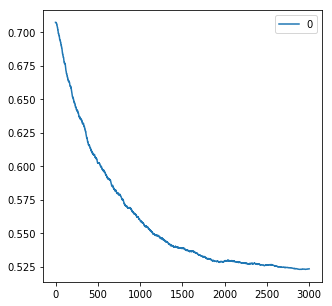

In [110]:
import matplotlib as plt

df = pd.DataFrame(L_Erms_Test)
pt = df.plot(figsize=(5,5))
pt

In [93]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score

In [94]:
'''Calculating the Precision Score, The precision is intuitively the ability of the classifier not to label 
as positive a sample that is negative. &  The recall is intuitively the ability of the classifier to find all the 
positive samples.
The best value is 1 and the worst value is 0 for both.'''
print(confusion_matrix(TrainingTarget,np.around(TR_TEST_OUT,0)))
print(precision_score(TrainingTarget, TR_TEST_OUT.round(), average='binary'))
print(recall_score(TrainingTarget, TR_TEST_OUT.round(), average='binary'))

[[41829 15383]
 [40376 16862]]
0.5229337881842147
0.2945945001572382


In [95]:
print(confusion_matrix(ValDataAct,np.around(VAL_TEST_OUT,0)))
print(precision_score(ValDataAct, VAL_TEST_OUT.round(), average ='binary'))
print(recall_score(ValDataAct, VAL_TEST_OUT.round(), average ='binary'))

[[5245 1925]
 [5016 2120]]
0.5241038318912238
0.297085201793722


In [96]:
print(confusion_matrix(TestDataAct,np.around(TEST_OUT,0)))
print(precision_score(TestDataAct, TEST_OUT.round(), average='binary'))
print(recall_score(TestDataAct, TEST_OUT.round(), average='binary'))

[[5174 1975]
 [5076 2080]]
0.5129469790382244
0.2906651760760201
